In [1]:
from sympy import *
from fractions import Fraction
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import hypergeom
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats import norm
from IPython.display import display, Latex, HTML, Math
import statsmodels.api as sm
from scipy import stats
import numpy as np
import sympy as sp
import math as math
from matplotlib import pyplot as plt
from sympy.abc import t
from IPython.display import display, Math, Latex
import numpy as np
%matplotlib inline
x, y, z, t, u, c = symbols('x y z t u c')
sp.init_printing() 

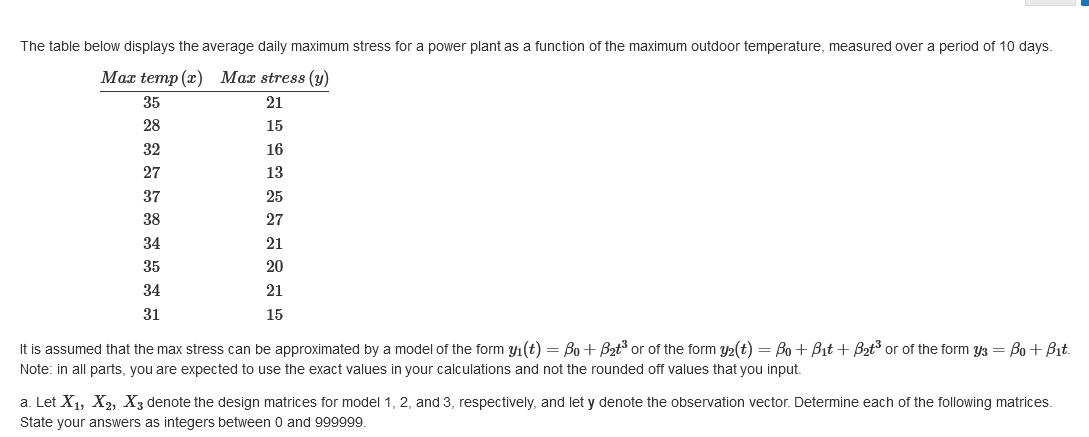

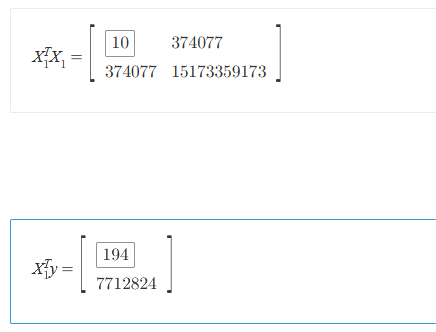

In [9]:
# Data
x = np.array([35,28,32,27,37,38,34,35,34,31])
y = np.array([21,15,16,13,25,27,21,20,21,15])

# Design matrices for the three models
X1 = Matrix([ones(len(x), 1)]).row_join(Matrix(x**3))  # Model 1: β0 + β1*t³
X2 = Matrix([ones(len(x), 1)]).row_join(Matrix(x)).row_join(Matrix(x**3))  # Model 2: β0 + β1*t + β2*t³
X3 = Matrix([ones(len(x), 1)]).row_join(Matrix(x))  # Model 3: β0 + β1*t

# Model 1: y1(t) = β0 + β1*t³
X1tX1 = X1.T*X1
X1ty = X1.T*Matrix(y)
Mat, _ = X1tX1.row_join(X1ty).rref()
B1 = Mat[:,-1]
display(Latex("$$y_1(t) = {} + {}t^3$$".format(round(B1[0],4), round(B1[1], 4))))
display(X1tX1)
display(X1ty)


# Model 2: y2(t) = β0 + β1*t² + β2*t³
X2tX2 = X2.T*X2
X2ty = X2.T*Matrix(y)
Mat, _ = X2tX2.row_join(X2ty).rref()
B2 = Mat[:,-1]
display(Latex("$$y_2(t) = {} + {}t^2 + {}t^3$$".format(round(B2[0],4), round(B2[1], 4), round(B2[2], 4))))
display(X2tX2)
display(X2ty)

# Model 3: y3(t) = β0 + β1*t
X3tX3 = X3.T*X3
X3ty = X3.T*Matrix(y)
Mat, _ = X3tX3.row_join(X3ty).rref()
B3 = Mat[:,-1]
display(Latex("$$y_3(t) = {} + {}t$$".format(round(B3[0],4), round(B3[1], 4))))
display(X3tX3)
display(X3ty)

# Calculate errors (least squares sense)
e1 = (Matrix(y) - X1*B1).norm()
e2 = (Matrix(y) - X2*B2).norm()
e3 = (Matrix(y) - X3*B3).norm()

display(Latex("$$e_1 = {}$$".format(round(e1, 4))))
display(Latex("$$e_2 = {}$$".format(round(e2, 4))))
display(Latex("$$e_3 = {}$$".format(round(e3, 4))))

# Determine best model
errors = [float(e1), float(e2), float(e3)]
best_model = errors.index(min(errors)) + 1
display(Latex("$$Best \\ model: \\ Model \\ {}$$".format(best_model)))

# Predict stress when max temp = 40
t_predict = 40

 # Model 2: y₂(t) = β₀ + β₁t + β₂t³
y_predicted = float(B2[0]) + float(B2[1]) * t_predict + float(B2[2]) * (t_predict**3)
display(Latex("$$y_2({}) = {} + {} \\times {} + {} \\times {}^3 = {}$$".format(t_predict, round(float(B2[0]), 4), round(float(B2[1]), 4), t_predict, 
round(float(B2[2]), 4), t_predict, round(y_predicted, 4))))



<IPython.core.display.Latex object>

⎡  10      374077   ⎤
⎢                   ⎥
⎣374077  15173359173⎦

⎡  194  ⎤
⎢       ⎥
⎣7712824⎦

<IPython.core.display.Latex object>

⎡  10      331       374077   ⎤
⎢                             ⎥
⎢ 331     11073     12751413  ⎥
⎢                             ⎥
⎣374077  12751413  15173359173⎦

⎡  194  ⎤
⎢       ⎥
⎢ 6562  ⎥
⎢       ⎥
⎣7712824⎦

<IPython.core.display.Latex object>

⎡10    331 ⎤
⎢          ⎥
⎣331  11073⎦

⎡194 ⎤
⎢    ⎥
⎣6562⎦

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>